In [1]:
import torch

In [ ]:
# construct a DAG, depth = L
# the rules are : each parent can have multiple children,
# each child can have multiple parents

# assign a unique string to each node 

# plot this 

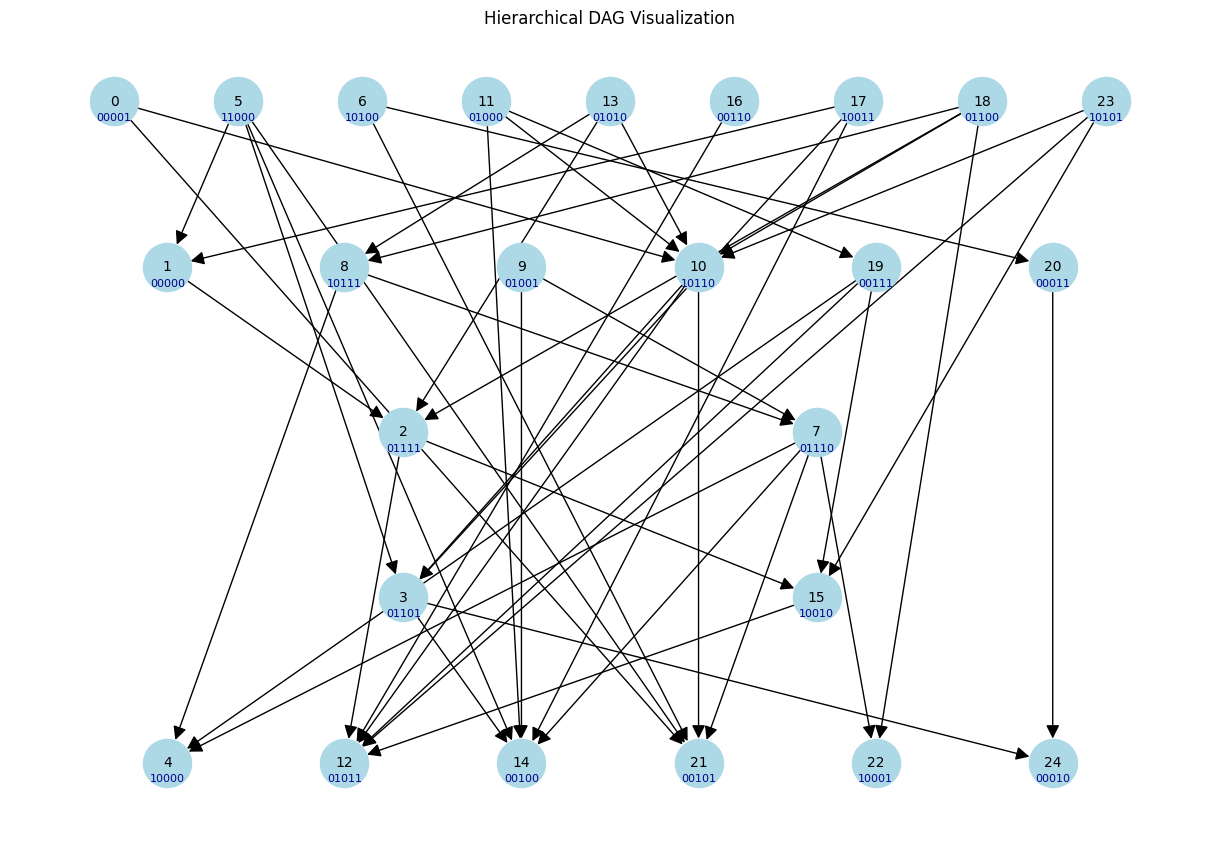

In [5]:
import networkx as nx
import random
import math

def generate_dag(L, N, C, seed=None):
    if seed is not None:
        random.seed(seed)

    G = nx.DiGraph()
    
    # Step 1: Partition nodes into L layers
    layers = [[] for _ in range(L)]
    
    # Assign at least one node per layer to ensure full depth
    remaining_nodes = N - L
    for i in range(L):
        layers[i].append(i)  # assign one node per layer initially
    
    node_idx = L
    while remaining_nodes > 0:
        layer = random.randint(0, L - 1)
        layers[layer].append(node_idx)
        node_idx += 1
        remaining_nodes -= 1
    
    # Step 2: Add nodes to the graph
    for idx, layer_nodes in enumerate(layers):
        G.add_nodes_from(layer_nodes, layer=idx)

    # Step 3: Connect nodes respecting DAG structure (only forward edges)
    for i in range(L - 1):
        current_layer = layers[i]
        next_layers = sum(layers[i+1:], [])  # all nodes in subsequent layers
        
        for parent in current_layer:
            num_children = random.randint(1, min(C, len(next_layers)))
            children = random.sample(next_layers, num_children)
            for child in children:
                G.add_edge(parent, child)

    # Step 4: Assign unique binary strings of length ceil(log2(N))
    binary_len = math.ceil(math.log2(N))
    node_ids = list(G.nodes())
    random.shuffle(node_ids)  # randomize assignment order
    binaries = [format(i, f'0{binary_len}b') for i in range(N)]
    node_binary_map = dict(zip(node_ids, binaries))
    
    nx.set_node_attributes(G, node_binary_map, 'binary_id')
    
    return G


import networkx as nx
import matplotlib.pyplot as plt

def visualize_dag_layers(G):
    layers = {}
    for node, data in G.nodes(data=True):
        layer = data['layer']
        if layer not in layers:
            layers[layer] = []
        layers[layer].append(node)
    
    pos = {}
    max_width = max(len(nodes) for nodes in layers.values())

    for layer_idx, nodes in layers.items():
        width = len(nodes)
        spacing = max_width / (width + 1)
        y = -layer_idx  # negative so root is on top
        for i, node in enumerate(sorted(nodes)):
            x = (i + 1) * spacing
            pos[node] = (x, y)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, arrowsize=20, node_size=1200, node_color='lightblue', font_size=10)

    labels = nx.get_node_attributes(G, 'binary_id')
    nx.draw_networkx_labels(G, {k: (v[0], v[1]-0.1) for k,v in pos.items()}, labels=labels, font_size=8, font_color='darkblue')

    plt.title("Hierarchical DAG Visualization")
    plt.axis('off')
    plt.show()

# Example Usage with the previously generated DAG:

L = 5
N = 25
C = 4
seed = 42

dag = generate_dag(L, N, C, seed)
visualize_dag_layers(dag)


